## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_df[["Mouse ID", "Timepoint"]]


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep = False)] #https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

In [31]:
# double checking if any duplicates left
clean_df1 = clean_df[clean_df[["Mouse ID", "Timepoint"]].duplicated() == True] 
clean_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
print(f"Key statistcis for the tumor volume for each regimen:")
group = clean_df.groupby("Drug Regimen")
group_df = pd.DataFrame({"Mean": group["Tumor Volume (mm3)"].mean()})
group_df["Median"] = group["Tumor Volume (mm3)"].median() 
group_df["Variance"] = group["Tumor Volume (mm3)"].var() 
group_df["St Deviation"] = group["Tumor Volume (mm3)"].std()
group_df["SEM"] = group["Tumor Volume (mm3)"].sem()

group_df


Key statistcis for the tumor volume for each regimen:


,Mean,Median,Variance,St Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

              Count Timepoint
Drug Regimen                 
Capomulin                 230
Ceftamin                  178
Infubinol                 178
Ketapril                  188
Naftisol                  186
Placebo                   181
Propriva                  156
Ramicane                  228
Stelasyn                  181
Zoniferol                 182


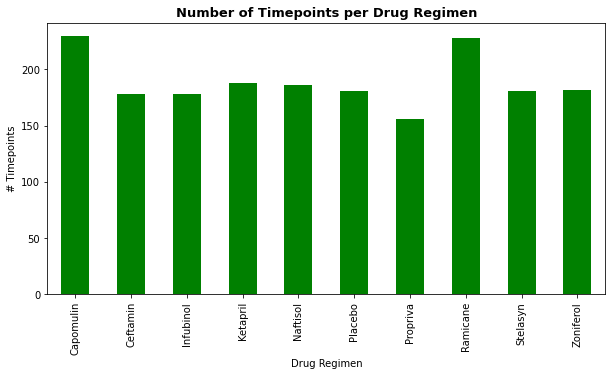

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tpoint_count = pd.DataFrame({"Count Timepoint": group["Timepoint"].count()})
print(tpoint_count)

tpoint_count.plot(kind = "bar", figsize = (10,5), color = "g", legend=False)
plt.title("Number of Timepoints per Drug Regimen", fontsize = 13, fontweight = 'bold')
plt.ylabel("# Timepoints")


plt.show()


In [35]:

tpoint_count.reset_index(inplace=True)

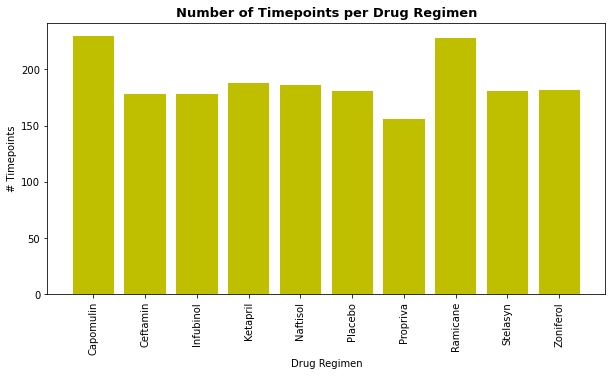

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = tpoint_count["Count Timepoint"]
x_axis = tpoint_count["Drug Regimen"]


plt.figure(figsize = (10,5))
plt.bar(x_axis, y_axis, color = 'y')

plt.title("Number of Timepoints per Drug Regimen", fontsize = 13, fontweight = 'bold')
plt.ylabel("# Timepoints")
plt.xlabel("Drug Regimen")

plt.xticks(rotation=90)

plt.show()


        Mouse ID
Sex             
Female       124
Male         125


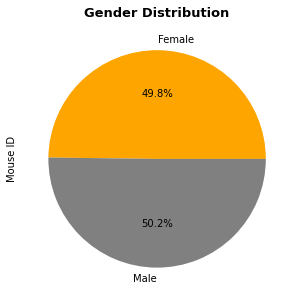

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group_gender = clean_df.groupby("Sex")
gender = pd.DataFrame(group_gender["Mouse ID"].nunique())
print(gender)

colors = ["orange", "grey"]
gender.plot(kind = "pie", colors = colors, figsize = (10,5), subplots = True, legend = False, autopct = "%1.1f%%")
plt.title("Gender Distribution", fontsize = 13, fontweight = 'bold')
plt.show()


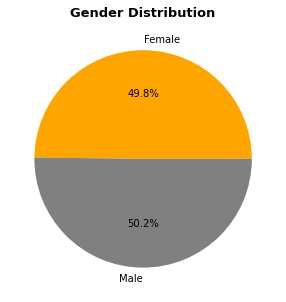

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender.reset_index(inplace=True) # reset index to be able to take names for the chart
plt.figure(figsize = (10,5))
plt.pie(gender["Mouse ID"], labels = gender["Sex"], colors = colors, autopct = "%1.1f%%")
plt.title("Gender Distribution", fontsize = 13, fontweight = 'bold')

plt.show()



## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_id = clean_df.groupby(["Mouse ID", "Drug Regimen"])
group_id_df = pd.DataFrame({"Timepoint": group_id["Timepoint"].max()})
group_id_df.reset_index(inplace=True)
group_id_df




,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
244,z435,Propriva,10
245,z578,Ramicane,45
246,z581,Infubinol,45
247,z795,Naftisol,45


In [40]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxpoint_df = pd.merge(group_id_df,clean_df, on = ["Mouse ID","Drug Regimen","Timepoint"], how = "inner")
maxpoint_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,10,Female,12,26,48.710661,0
245,z578,Ramicane,45,Male,11,16,30.638696,0
246,z581,Infubinol,45,Female,24,25,62.754451,3
247,z795,Naftisol,45,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumvoldata = []

for i in range(len(regimens)):
    data = maxpoint_df.loc[maxpoint_df["Drug Regimen"] == regimens[i],:]
    tumvoldata.append(data["Tumor Volume (mm3)"]) 
    
for x in range(len(tumvoldata)):
    d=pd.DataFrame(tumvoldata[x])
    quartiles = d['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier_occupancy = d.loc[(d['Tumor Volume (mm3)'] < lower_bound) | (d['Tumor Volume (mm3)'] > upper_bound)]
   
    print(f"Values outside the boudnaries: ")
    print(outlier_occupancy["Tumor Volume (mm3)"])
    print("--------------------------------")






The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values outside the boudnaries: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values outside the boudnaries: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the media

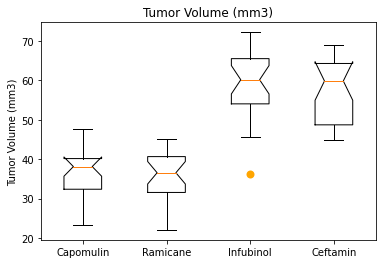

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='orange', markersize=8,
                  markeredgecolor='none')
ax1.set_title("Tumor Volume (mm3)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumvoldata,labels=regimens,notch=True, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

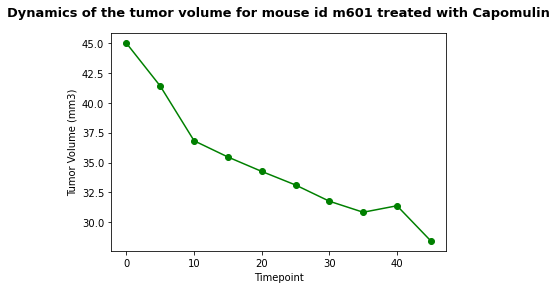

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = "m601"
capomulin_plot = pd.DataFrame(clean_df.loc[(clean_df["Drug Regimen"] == regimens[0]) & (clean_df["Mouse ID"] == mouse),:])    
capomulin_plot
plt.plot(capomulin_plot["Timepoint"],capomulin_plot["Tumor Volume (mm3)"], color = "g", marker = "o")
plt.title(f"Dynamics of the tumor volume for mouse id {mouse} treated with {regimens[0]}", fontsize = 13, fontweight = 'bold',y=1.05)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


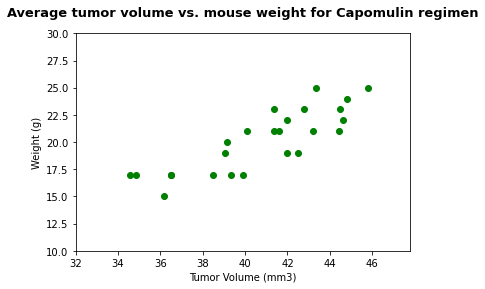

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_plot_sc = pd.DataFrame(clean_df.loc[(clean_df["Drug Regimen"] == regimens[0]),:])    
capomulin_plot_sc = capomulin_plot_sc.groupby(['Mouse ID']).mean()
capomulin_plot_sc
plt.scatter(capomulin_plot_sc["Tumor Volume (mm3)"],capomulin_plot_sc["Weight (g)"], marker = "o",facecolors = 'green')
plt.title(f"Average tumor volume vs. mouse weight for {regimens[0]} regimen", fontsize = 13, fontweight = 'bold', y=1.05)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.ylim(10,max(capomulin_plot_sc["Weight (g)"])+5)
plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


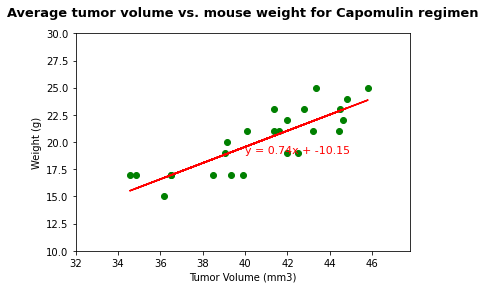

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_plot_sc["Tumor Volume (mm3)"]
y_values = capomulin_plot_sc["Weight (g)"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "o",facecolors = 'g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,19),fontsize=11,color="r")
plt.title(f"Average tumor volume vs. mouse weight for {regimens[0]} regimen", fontsize = 13, fontweight = 'bold', y=1.05)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.ylim(10,max(capomulin_plot_sc["Weight (g)"])+5)
plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}" )
plt.show()